# Classification Problem- Diabeties Mellitus

Problem Statement:
    Classify a person as diabetic, pre-diabetic and non-diabetic based on diet, excercise and health

# 1. Importing Libraries and creating dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
z=input("Enter the file name:")  #diabetes_data.csv

Enter the file name:diabetes_data.csv


In [3]:
# Read the file from drive
import os
import re
lst = []
for obj in os.listdir("/content/drive/MyDrive/"):
  if re.search(z, obj):
    csvpath=obj
    print(csvpath)
DM_df=pd.read_csv('/content/drive/MyDrive/'+csvpath)

diabetes_data.csv


In [4]:
# DM_df = pd.read_csv(r"C:\Users\Maitry\Desktop\Machine Learning\Capstone\diabetes_012_health_indicators_BRFSS2015.csv")
DM_df.shape

(253680, 21)

The data is of 253680 people with their diabetes status and 21 other details

In [5]:
DM_df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,1,0,1,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,0,0,0,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,0,0,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,1,0,1,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,1,0,1,2,3,0,0,0,11,5,4


In [6]:
DM_df.tail()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253675,0,1,1,1,45,0,0,0,0,1,1,0,1,3,0,5,0,1,5,6,7
253676,2,1,1,1,18,0,0,0,0,0,0,0,1,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,0,0,1,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,1,0,1,3,0,0,0,1,7,5,1
253679,2,1,1,1,25,0,0,1,1,1,0,0,1,2,0,0,0,0,9,6,2


# 2. Data Description

# 3. Exploratory Data Analysis & Cleaning Data

In [7]:
DM_df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

## Check for Duplicates

In [8]:
duplicates = DM_df[DM_df.duplicated()]
duplicates

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,2,1,1,1,27,1,0,0,0,0,1,0,1,5,0,30,1,0,10,4,5
1563,0,0,0,1,21,1,0,0,1,1,1,0,1,1,0,0,0,0,4,6,8
2700,0,0,0,1,32,0,0,0,1,1,1,0,1,2,0,0,0,0,5,6,8
3160,0,0,0,1,21,0,0,0,1,1,1,0,1,1,0,0,0,0,4,6,8
3332,0,0,0,1,24,0,0,0,1,1,1,0,1,1,0,0,0,1,9,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253492,2,1,1,1,33,0,0,0,1,1,1,0,1,3,0,0,0,1,9,6,6
253550,0,0,0,1,25,0,0,0,1,1,1,0,1,1,0,0,0,0,7,6,8
253563,0,0,1,1,24,1,0,0,1,1,1,0,1,2,0,0,0,1,8,6,8
253597,0,0,0,1,24,0,0,0,1,1,1,0,1,2,0,0,0,0,5,6,8


There are 24564 duplicates in the data

In [9]:
24564#Removing duplicates
DM_df= DM_df.drop_duplicates(keep="first")

In [10]:
print(f"The shape dataframe now is {DM_df.shape}")

The shape dataframe now is (229116, 21)


## Check for Null Values

In [11]:
DM_df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

There are no null values 

## Check for Unique Values

In [12]:
for i in DM_df.columns:
    print({i:DM_df[i].unique()})

{'Diabetes_012': array([0, 2, 1])}
{'HighBP': array([1, 0])}
{'HighChol': array([1, 0])}
{'CholCheck': array([1, 0])}
{'BMI': array([40, 25, 28, 27, 24, 30, 34, 26, 33, 21, 23, 22, 38, 32, 37, 31, 29,
       20, 35, 45, 39, 19, 47, 18, 36, 43, 55, 49, 42, 17, 16, 41, 44, 50,
       59, 48, 52, 46, 54, 57, 53, 14, 15, 51, 58, 63, 61, 56, 74, 62, 64,
       66, 73, 85, 60, 67, 65, 70, 82, 79, 92, 68, 72, 88, 96, 13, 81, 71,
       75, 12, 77, 69, 76, 87, 89, 84, 95, 98, 91, 86, 83, 80, 90, 78])}
{'Smoker': array([1, 0])}
{'Stroke': array([0, 1])}
{'HeartDiseaseorAttack': array([0, 1])}
{'PhysActivity': array([0, 1])}
{'Fruits': array([0, 1])}
{'Veggies': array([1, 0])}
{'HvyAlcoholConsump': array([0, 1])}
{'AnyHealthcare': array([1, 0])}
{'GenHlth': array([5, 3, 2, 4, 1])}
{'MentHlth': array([18,  0, 30,  3,  5, 15, 10,  6, 20,  2, 25,  1,  4,  7,  8, 21, 14,
       26, 29, 16, 28, 11, 12, 24, 17, 13, 27, 19, 22,  9, 23])}
{'PhysHlth': array([15,  0, 30,  2, 14, 28,  7, 20,  3, 10,  1,  

### Summary Statistics

In [13]:
DM_df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229116.000000,229116.000000,229116.000000,229116.000000,229116.000000,229116.000000,229116.000000,229116.000000,229116.000000,229116.000000,229116.000000,229116.000000,229116.000000,229116.000000,229116.000000,229116.000000,229116.000000,229116.000000,229116.000000,229116.000000,229116.000000
mean,0.326503,0.455263,0.442304,0.959448,28.694535,0.466161,0.044881,0.103493,0.732690,0.612345,0.794314,0.060860,0.945953,2.603493,3.514931,4.687874,0.186041,0.439288,8.090382,4.978862,5.886494
std,0.725396,0.497996,0.496661,0.197249,6.791418,0.498855,0.207044,0.304603,0.442556,0.487216,0.404203,0.239074,0.226111,1.064695,7.722474,9.055513,0.389141,0.496301,3.094168,0.993119,2.093292
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,4.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [14]:
DM_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229116 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          229116 non-null  int64
 1   HighBP                229116 non-null  int64
 2   HighChol              229116 non-null  int64
 3   CholCheck             229116 non-null  int64
 4   BMI                   229116 non-null  int64
 5   Smoker                229116 non-null  int64
 6   Stroke                229116 non-null  int64
 7   HeartDiseaseorAttack  229116 non-null  int64
 8   PhysActivity          229116 non-null  int64
 9   Fruits                229116 non-null  int64
 10  Veggies               229116 non-null  int64
 11  HvyAlcoholConsump     229116 non-null  int64
 12  AnyHealthcare         229116 non-null  int64
 13  GenHlth               229116 non-null  int64
 14  MentHlth              229116 non-null  int64
 15  PhysHlth              229116 non-n

### Data types

In [15]:
DM_df.dtypes

Diabetes_012            int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object

## Correlation

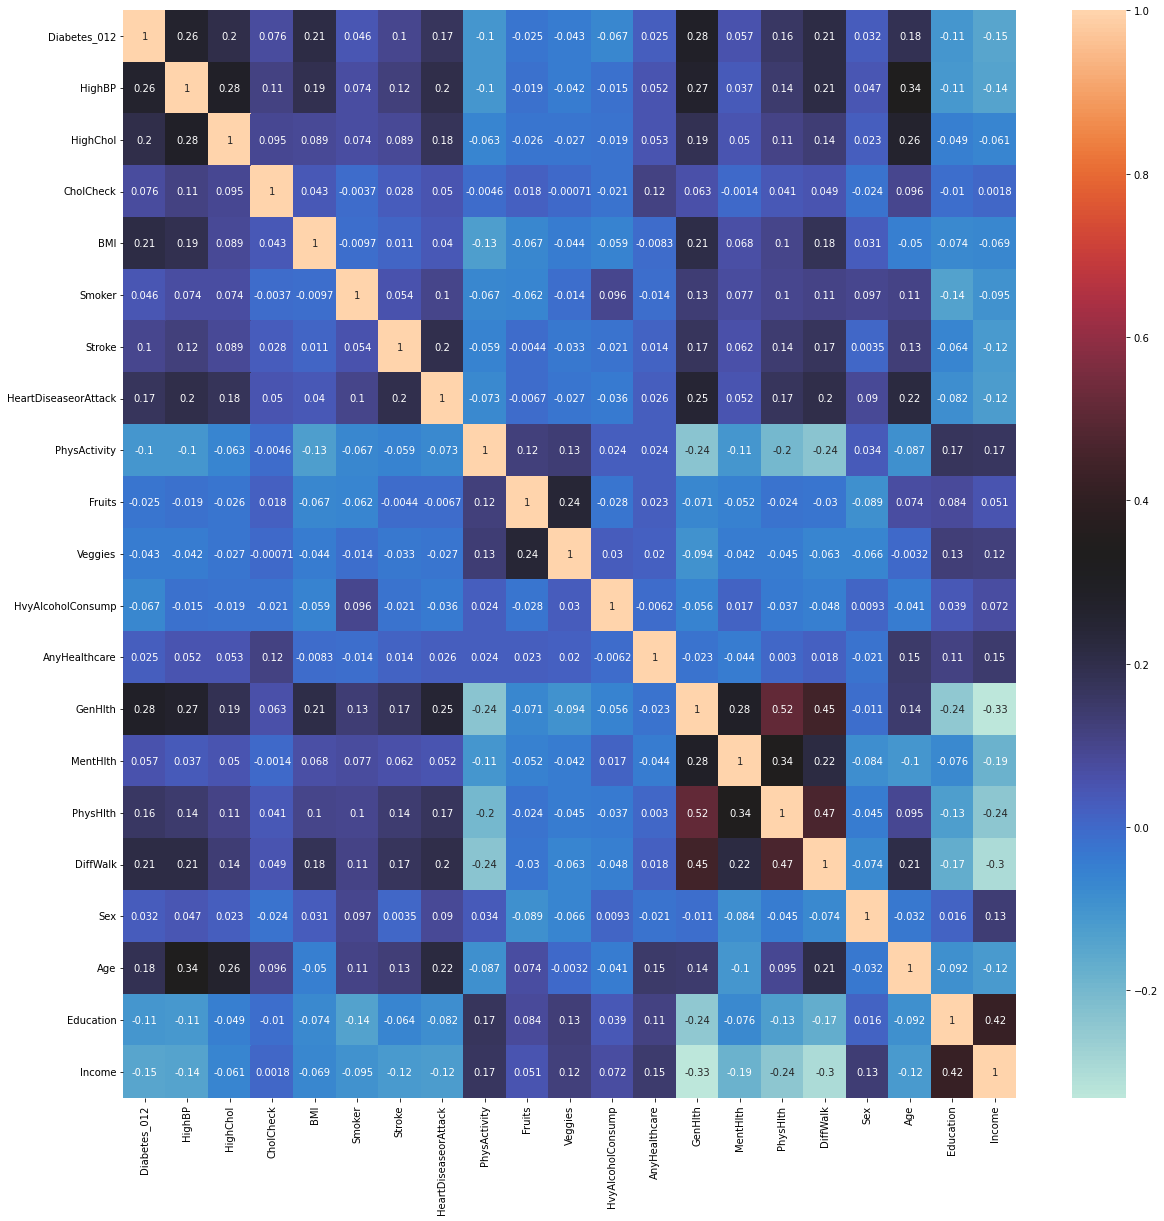

In [16]:
corr_df=DM_df.corr()
#print(corr_df)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(corr_df,cmap= "icefire",annot=True)
plt.show()

## Value counts of Variables

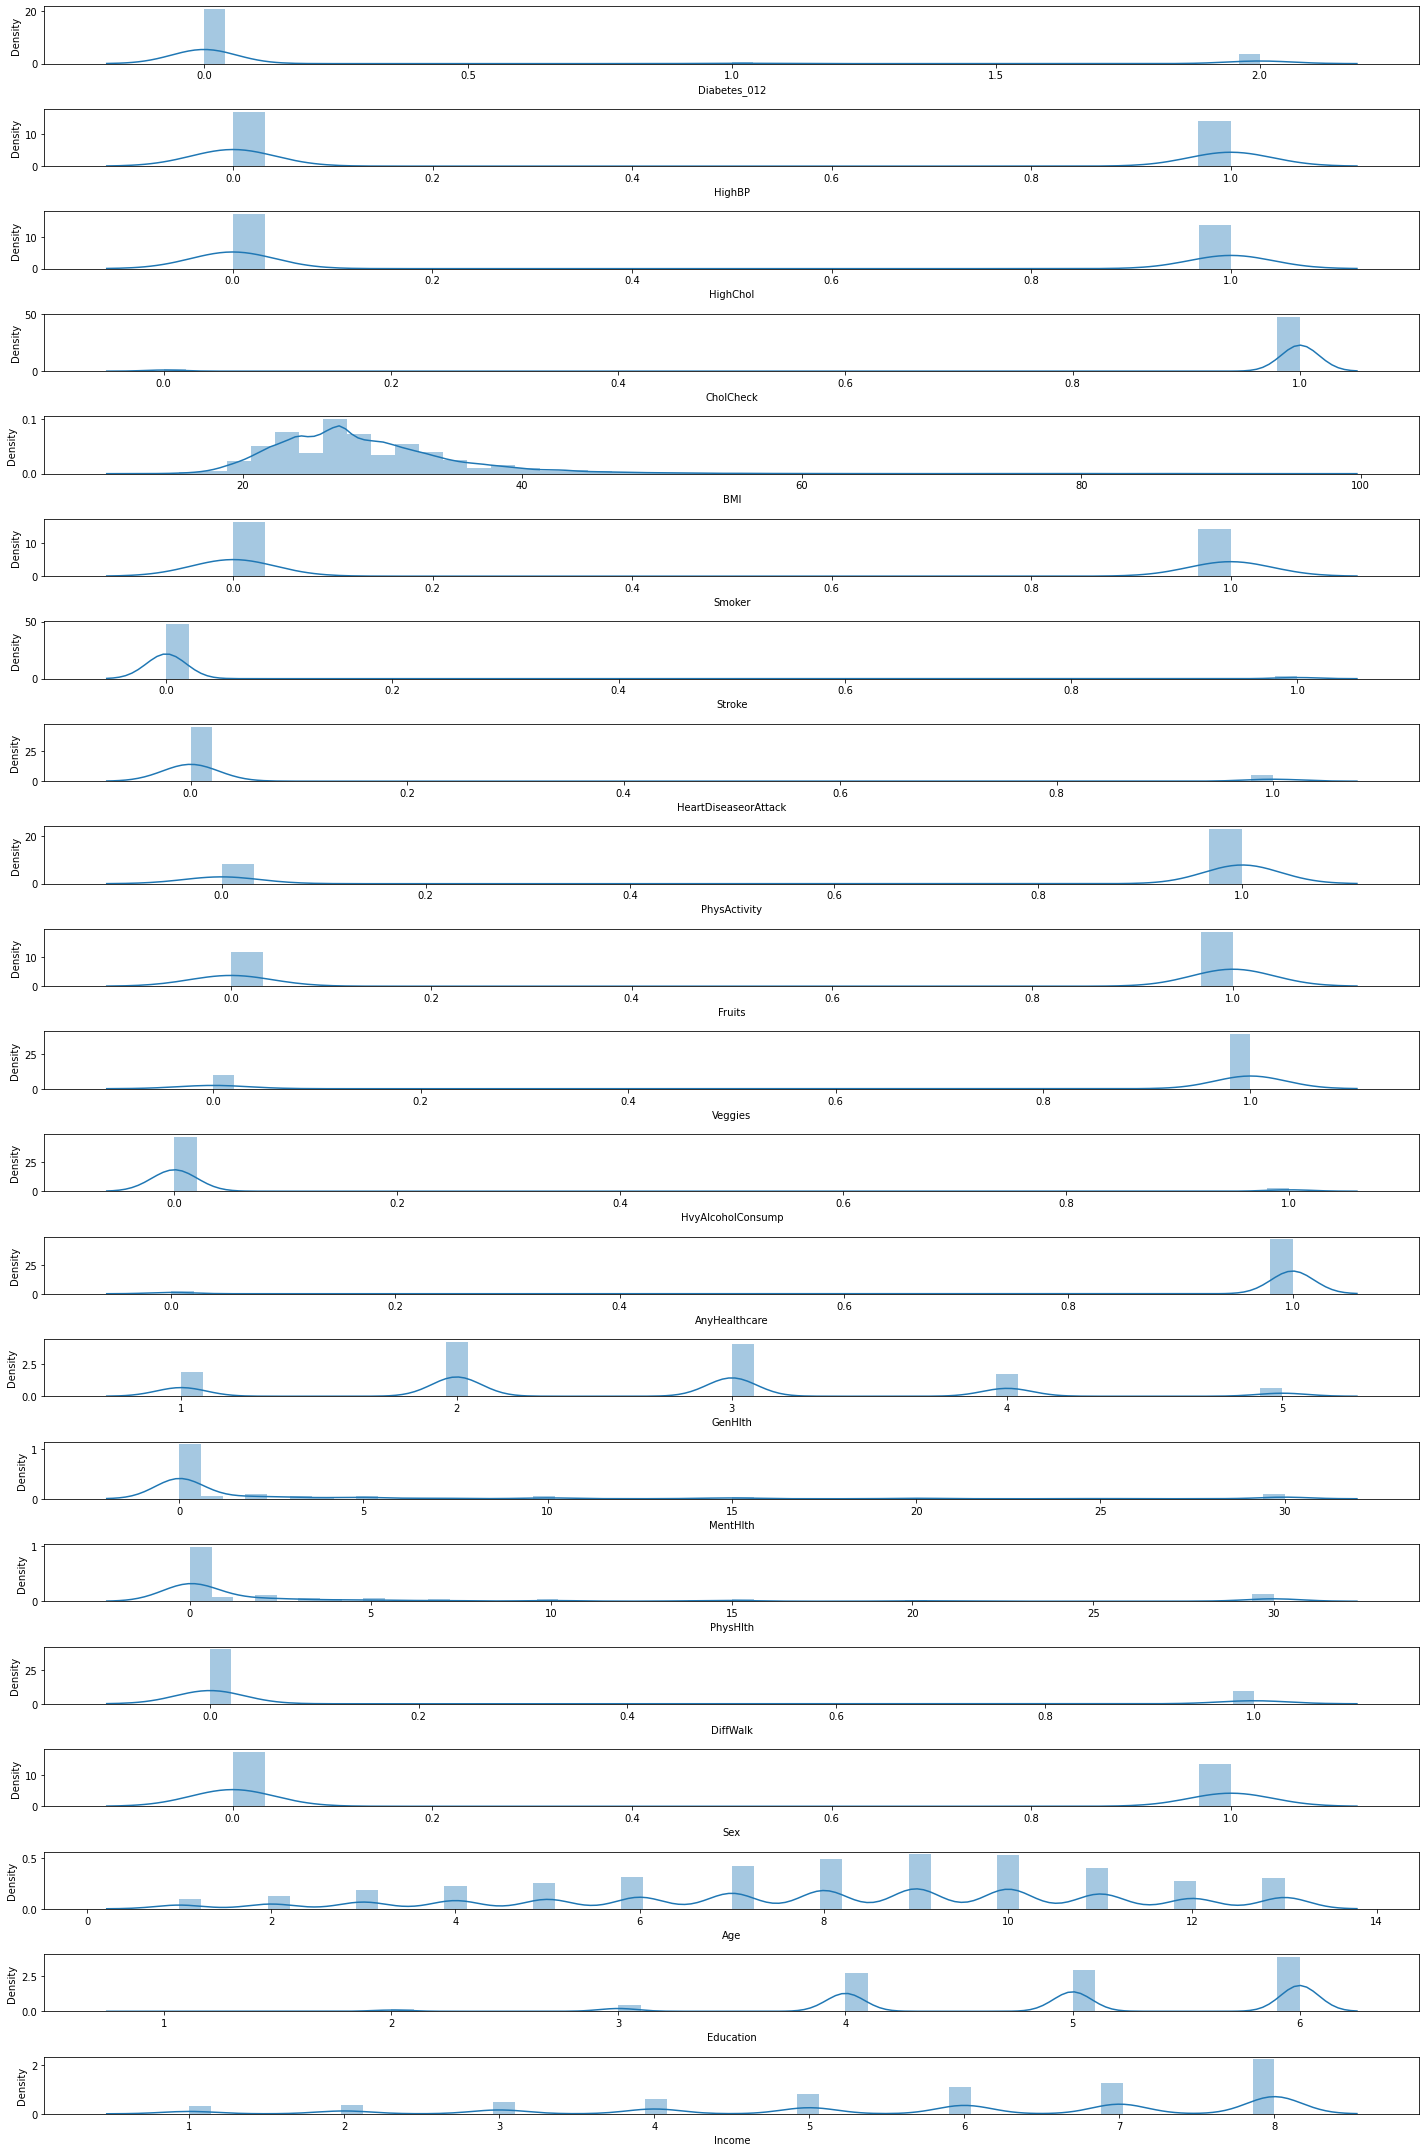

In [17]:
feats=DM_df.columns
# Plot distribution of numerical columns
fig=plt.figure(figsize=(20,30))
for i, col in enumerate(feats):
    plt.subplot(len(feats),1,1*i+1)
    sns.distplot(DM_df[col])
    
fig.tight_layout()
plt.show()

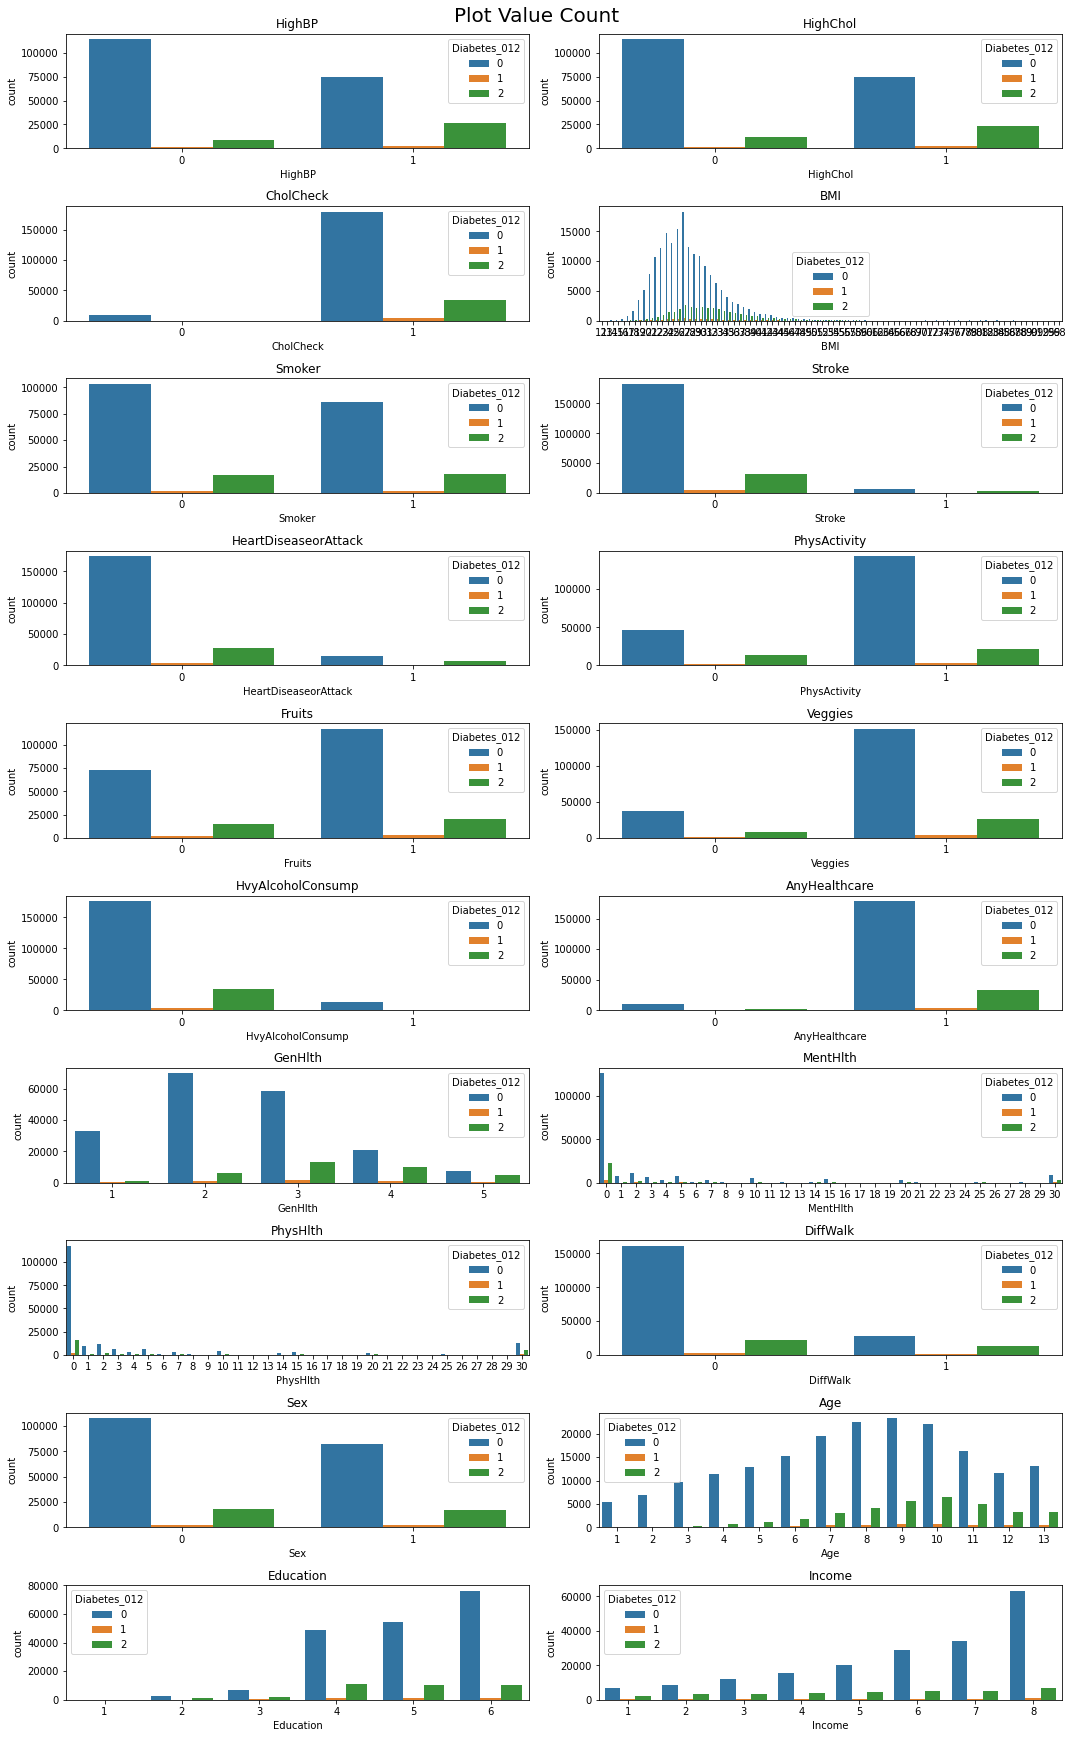

In [18]:
Variables = DM_df.columns
plt.figure(figsize=(15,50))
for i,column in enumerate(Variables[1:]):
    plt.subplot(len(Variables), 2, i+1)
    plt.suptitle("Plot Value Count", fontsize=20, x=0.5, y=1)
    sns.countplot(data=DM_df, x=column, hue='Diabetes_012')
    plt.title(f"{column}")
    plt.tight_layout()

## Check for Outliers

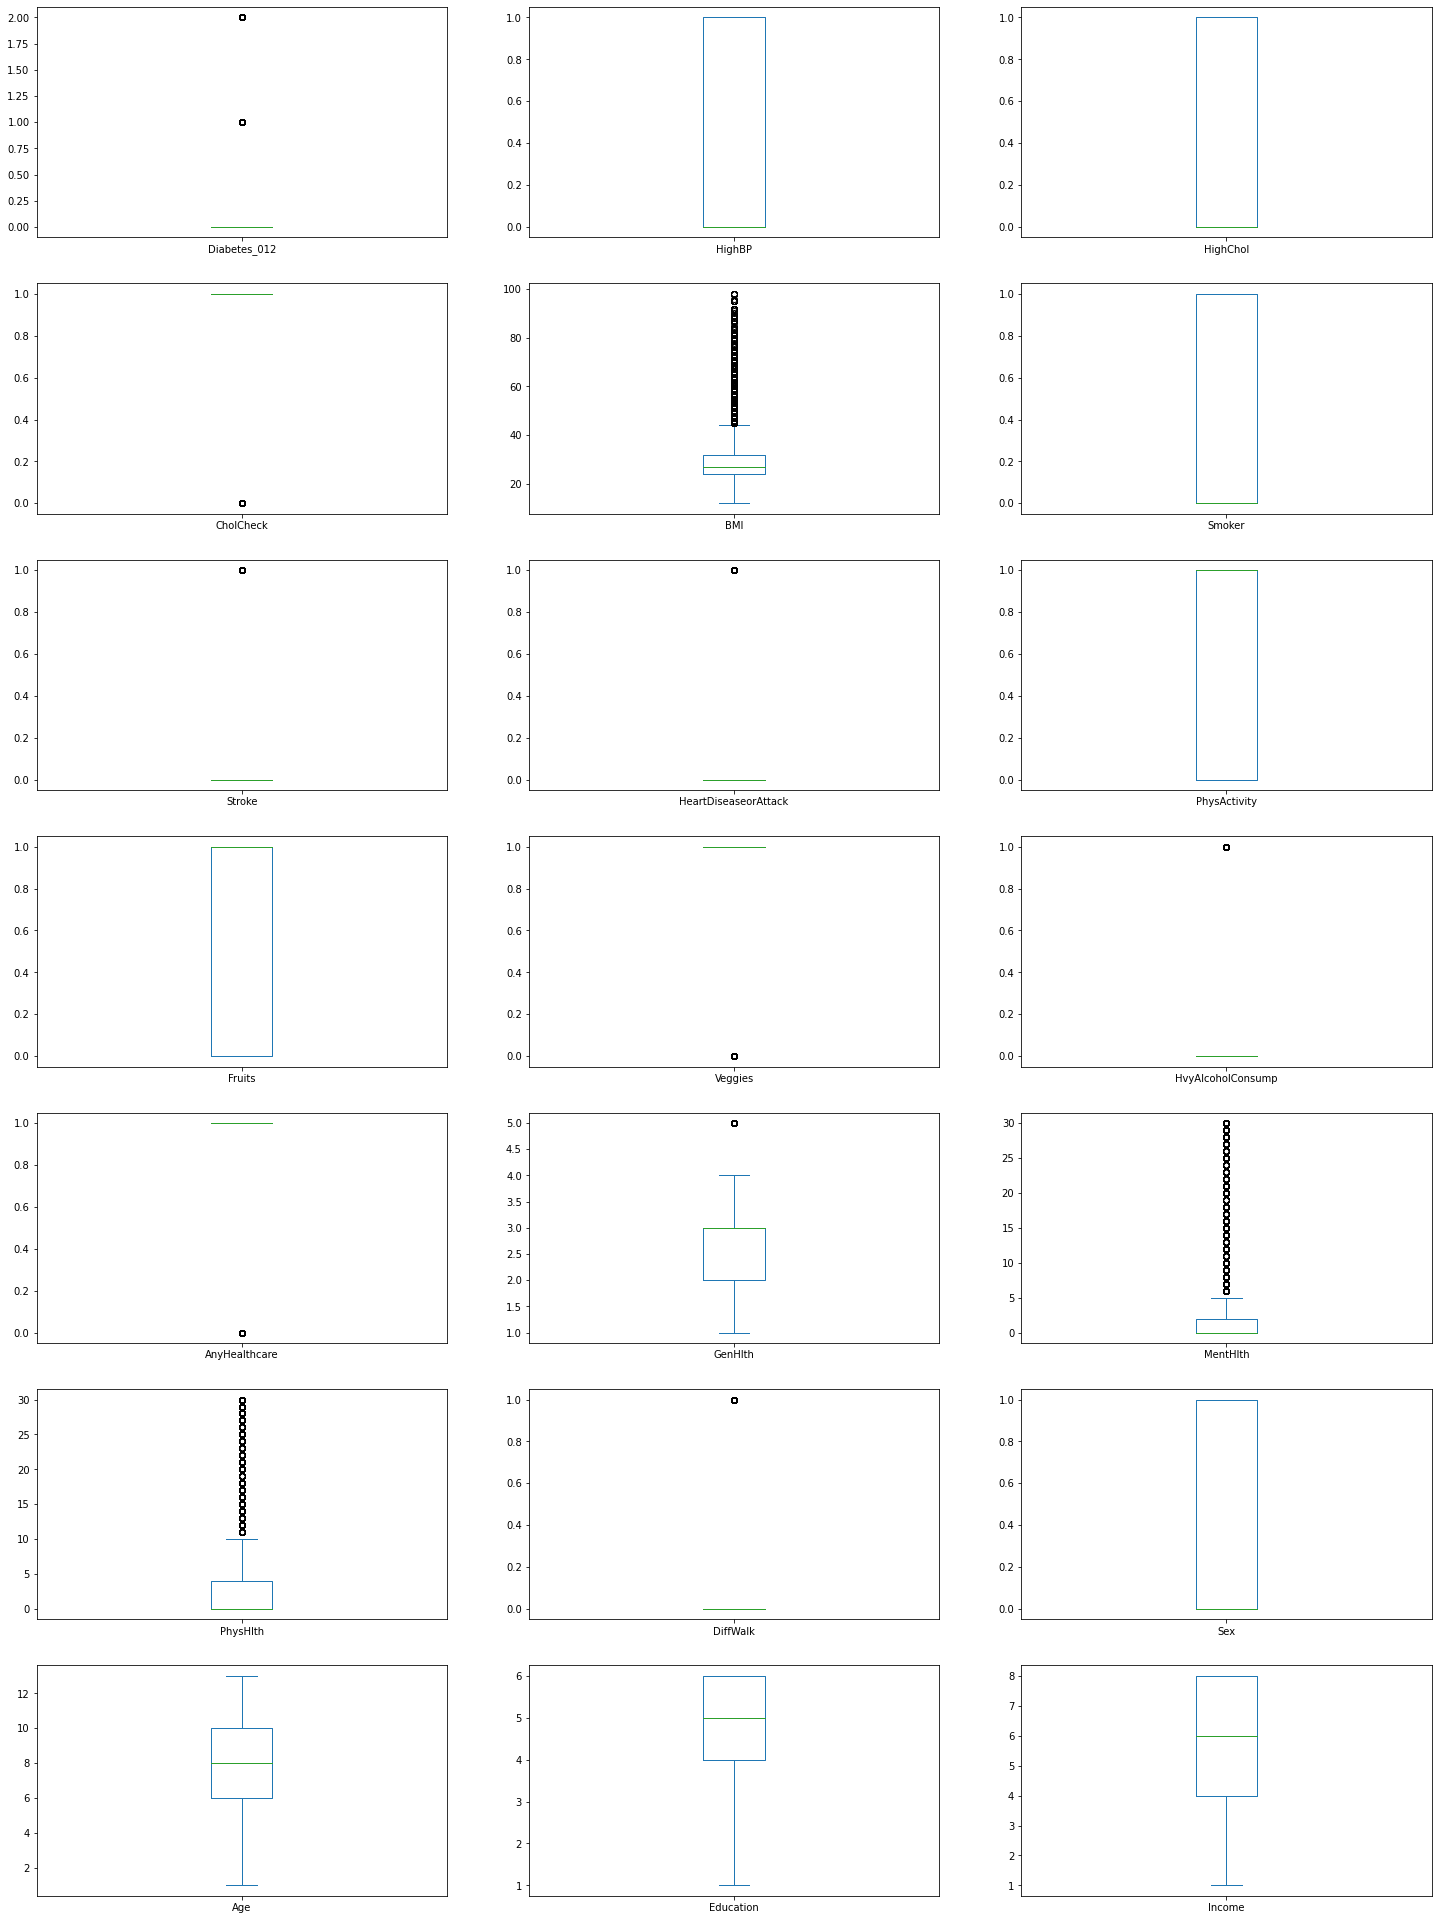

In [19]:
# %matplotlib inline
DM_df.plot(kind='box' , figsize = (25, 50), subplots=True, layout=(10,3), sharex=False)
plt.show()

### Diabetes Variable

In [20]:
# Multiclass variable
DM_df.Diabetes_012.value_counts()

0    189398
2     35089
1      4629
Name: Diabetes_012, dtype: int64

In [21]:
DM_df.Diabetes_012[DM_df.Diabetes_012 == 1].count()/DM_df.Diabetes_012.count()

0.02020373959042581

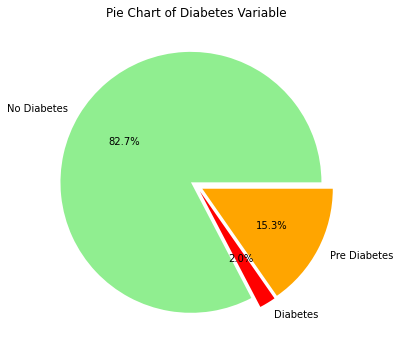

In [22]:
# pie plot of diabetes ratio 
plt.figure(figsize=(8,6))
labels = ['No Diabetes', 'Diabetes', 'Pre Diabetes']
sizes = [DM_df['Diabetes_012'].value_counts()[0], DM_df['Diabetes_012'].value_counts()[1], DM_df['Diabetes_012'].value_counts()[2]]
colors = ['lightgreen', 'red', 'orange']
explode = (0.05, 0.05, 0.05)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, autopct='%.1f%%', colors=colors, data = DM_df)
plt.title('Pie Chart of Diabetes Variable', fontsize=12)
plt.show()



Here, we observe that the data is imbalanced, the class "No Diabetes" is in majority 82.7%
About 15% are of "Pre-diabetes" and 2% are of "Diabetes"

# 3. Creating X and Y

In [23]:
#Creating X and Y
X = DM_df.values[:, 1:]
Y = DM_df.values[:, 0]

In [24]:
print(X.shape, Y.shape)

(229116, 20) (229116,)


# 4. Scaling the data

In [25]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

scaler.fit(X)

X= scaler.transform(X)

print(X)

[[ 1.09386167  1.12289213  0.2055856  ...  0.29397882 -0.98564691
  -1.37892893]
 [-0.91419238 -0.8905575  -4.86415394 ... -0.35239993  1.02821545
  -2.33436404]
 [ 1.09386167  1.12289213  0.2055856  ...  0.29397882 -0.98564691
   1.00965883]
 ...
 [-0.91419238 -0.8905575   0.2055856  ... -1.96834679  0.02128427
  -1.85664649]
 [ 1.09386167 -0.8905575   0.2055856  ... -0.35239993  0.02128427
  -2.33436404]
 [ 1.09386167  1.12289213  0.2055856  ...  0.29397882  1.02821545
  -1.85664649]]


# 5. Training and Validation Split

In [26]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
                                                    random_state=10)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(160381, 20) (68735, 20) (160381,) (68735,)


# 6. SMOTE

In [27]:
print("Before OverSampling, counts of label '1': ", (sum(Y_train == 1)))
print("Before OverSampling, counts of label '2': ", (sum(Y_train == 2)))
  
# import SMOTE from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 10,k_neighbors=5)
X_res, Y_res = sm.fit_resample(X, Y)

  
print('After OverSampling, the shape of train_X: ', (X_res.shape))
print('After OverSampling, the shape of train_y: ', (Y_res.shape))
  
print("After OverSampling, counts of label '1': ", (sum(Y_res == 1)))
print("After OverSampling, counts of label '2': ", (sum(Y_res == 2)))

Before OverSampling, counts of label '1':  3221
Before OverSampling, counts of label '2':  24659
After OverSampling, the shape of train_X:  (568194, 20)
After OverSampling, the shape of train_y:  (568194,)
After OverSampling, counts of label '1':  189398
After OverSampling, counts of label '2':  189398


In [28]:
from sklearn.model_selection import train_test_split
  
# split into 70:30 ratio
X_trainS, X_testS, Y_trainS, Y_testS = train_test_split(X_res, Y_res, test_size = 0.3, 
                                                    random_state = 10)
print(X_trainS.shape, X_testS.shape, Y_trainS.shape, Y_testS.shape)

(397735, 20) (170459, 20) (397735,) (170459,)


# 7. Building Model

### (A1)Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression 
#create a model
classifier=LogisticRegression()
#fitting the training data to the model
classifier.fit(X_train, Y_train)
Y_pred= classifier.predict(X_test)
print(Y_pred)

[0 0 0 ... 0 0 0]


In [30]:
print(classifier.intercept_)
print(list(zip(DM_df.columns[1:], classifier.coef_.ravel())))

[ 2.04445709 -1.87869631 -0.16576079]
[('HighBP', -0.1925712353039928), ('HighChol', -0.19463109130914638), ('CholCheck', -0.14968996175881258), ('BMI', -0.244399076086583), ('Smoker', 0.01814338344231446), ('Stroke', -0.0006468890933840212), ('HeartDiseaseorAttack', -0.01053260606830555), ('PhysActivity', -0.00021231626605836413), ('Fruits', 0.012960266214633967), ('Veggies', 0.004174834036025084), ('HvyAlcoholConsump', 0.09334448801803757), ('AnyHealthcare', 0.008204244302554255), ('GenHlth', -0.27749357616566517), ('MentHlth', -0.007889856576028148), ('PhysHlth', 0.02958479888469735), ('DiffWalk', -0.018420081804120685), ('Sex', -0.049385016242493245), ('Age', -0.24525873843191767), ('Education', 0.03183346839024778), ('Income', 0.06793776416640339)]


In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report
print('\033[1m' + "Base Model Logistic Regression"+ '\033[0m' "\n")
print(f"The training accuracy of the model is {classifier.score(X_train,Y_train)}. \n")

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

Base Model Logistic Regression

The training accuracy of the model is 0.8306532569319308. 

[[55411     0  1486]
 [ 1297     0   111]
 [ 8631     0  1799]]
Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.97      0.91     56897
           1       0.00      0.00      0.00      1408
           2       0.53      0.17      0.26     10430

    accuracy                           0.83     68735
   macro avg       0.46      0.38      0.39     68735
weighted avg       0.78      0.83      0.79     68735

Accuracy of the model:  0.8323270531752383


#### (A2)Logistic Regression with Tuning

In [32]:
#store the predicted probabilities
y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)

[[0.61239075 0.04251421 0.34509504]
 [0.81634865 0.0216836  0.16196775]
 [0.97015919 0.00711663 0.02272419]
 ...
 [0.82580156 0.01998195 0.15421648]
 [0.97576401 0.00593604 0.01829996]
 [0.70449413 0.04585958 0.24964629]]


In [33]:
y_pred_class = []
for value in y_pred_prob[:,2]:
    if value > 0.40:
        y_pred_class.append(1)
    elif 0.3< value <0.50:
        y_pred_class.append(2)
    elif value <0.65:
        y_pred_class.append(0)

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report
print('\033[1m' + "Tuned Logistic Regression"+ '\033[0m' "\n")
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,y_pred_class))

acc=accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc)

Tuned Logistic Regression

[[50911  2877  3109]
 [  992   209   207]
 [ 5752  2903  1775]]
Classification report: 
              precision    recall  f1-score   support

           0       0.88      0.89      0.89     56897
           1       0.03      0.15      0.06      1408
           2       0.35      0.17      0.23     10430

    accuracy                           0.77     68735
   macro avg       0.42      0.40      0.39     68735
weighted avg       0.78      0.77      0.77     68735

Accuracy of the model:  0.7695497199388958


#### (A3)Logistic Regression with SMOTE

In [35]:
from sklearn.linear_model import LogisticRegression 
#create a model
classifier=LogisticRegression()
#fitting the training data to the model
classifier.fit(X_trainS, Y_trainS)
Y_pred= classifier.predict(X_testS)
print(Y_pred)

[0 1 1 ... 0 2 0]


In [36]:
print(classifier.intercept_)
print(list(zip(DM_df.columns[1:], classifier.coef_.ravel())))

[ 0.2934826   0.04705824 -0.34054084]
[('HighBP', -0.17165265933422194), ('HighChol', -0.20394611072228214), ('CholCheck', -0.13775161225086752), ('BMI', -0.3306532862618603), ('Smoker', 0.015224941038867802), ('Stroke', 0.0025773483368923366), ('HeartDiseaseorAttack', -0.003663070345752947), ('PhysActivity', -0.008171726455939962), ('Fruits', -0.001376487104089843), ('Veggies', -0.00502032197638021), ('HvyAlcoholConsump', 0.08718728355943298), ('AnyHealthcare', 0.011632272837227953), ('GenHlth', -0.3775998562781502), ('MentHlth', 0.0052853886367714405), ('PhysHlth', 0.06892785435530067), ('DiffWalk', 0.005170450837897334), ('Sex', -0.05559089893031415), ('Age', -0.35013384511704576), ('Education', 0.011152416046055635), ('Income', 0.07242336561767554)]


In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report
print('\033[1m' + "Logistic Regression Base Model Along with Smote"+ '\033[0m' "\n")
print(f"The training accuracy of the model is {classifier.score(X_trainS,Y_trainS)}. \n")

cfm=confusion_matrix(Y_testS,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_testS,Y_pred))

acc=accuracy_score(Y_testS, Y_pred)
print("Accuracy of the model: ",acc)

Logistic Regression Base Model Along with Smote

The training accuracy of the model is 0.5138396168303015. 

[[36420 10437 10186]
 [15841 17865 23222]
 [ 9152 13778 33558]]
Classification report: 
              precision    recall  f1-score   support

           0       0.59      0.64      0.61     57043
           1       0.42      0.31      0.36     56928
           2       0.50      0.59      0.54     56488

    accuracy                           0.52    170459
   macro avg       0.51      0.52      0.51    170459
weighted avg       0.51      0.52      0.51    170459

Accuracy of the model:  0.5153321326536


##### (A4)Logistic Regression with Tuning along with SMOTE

In [38]:
#store the predicted probabilities
y_pred_prob = classifier.predict_proba(X_testS)
print(y_pred_prob)

[[0.51478391 0.29087578 0.19434031]
 [0.342064   0.39277202 0.26516398]
 [0.39537984 0.436287   0.16833316]
 ...
 [0.57079381 0.30181104 0.12739515]
 [0.15182302 0.34504412 0.50313285]
 [0.57047136 0.29245203 0.13707661]]


In [39]:
y_pred_class = []
for value in y_pred_prob[:,2]:
    if value > 0.40:
        y_pred_class.append(1)
    elif 0.3< value <0.50:
        y_pred_class.append(2)
    elif value <0.65:
        y_pred_class.append(0)

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report
print('\033[1m' + "Tuning along with SMOTE"+ '\033[0m' "\n")
print(f"The training accuracy of the model is {classifier.score(X_trainS,Y_trainS)}. \n")

cfm=confusion_matrix(Y_testS,y_pred_class)
print(cfm)

print("Classification report: ")

print(classification_report(Y_testS,y_pred_class))

acc=accuracy_score(Y_testS, y_pred_class)
print("Accuracy of the model: ",acc)

Tuning along with SMOTE

The training accuracy of the model is 0.5138396168303015. 

[[40016  9083  7944]
 [21219 22350 13359]
 [12141 32504 11843]]
Classification report: 
              precision    recall  f1-score   support

           0       0.55      0.70      0.61     57043
           1       0.35      0.39      0.37     56928
           2       0.36      0.21      0.26     56488

    accuracy                           0.44    170459
   macro avg       0.42      0.43      0.42    170459
weighted avg       0.42      0.44      0.42    170459

Accuracy of the model:  0.43534808956992593


Base Model of Logistic Regression gave the best Accuracy of 83.2%. However does not perform well on class 1

### (B1)Decision Tree

In [41]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree= DecisionTreeClassifier()

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train, Y_train)
Y_pred = model_DecisionTree.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report
print('\033[1m' + "BASE DECISION TREE"+ '\033[0m' "\n")

print(f"The training accuracy of the model is {model_DecisionTree.score(X_train,Y_train)}. \n")

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

BASE DECISION TREE

The training accuracy of the model is 0.9938583747451382. 

[[47495  1365  8037]
 [ 1017    54   337]
 [ 6630   435  3365]]
Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.83      0.85     56897
           1       0.03      0.04      0.03      1408
           2       0.29      0.32      0.30     10430

    accuracy                           0.74     68735
   macro avg       0.39      0.40      0.39     68735
weighted avg       0.76      0.74      0.75     68735

Accuracy of the model:  0.740728886302466


#### (B2)Decision Tree with Tuning

In [43]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree= DecisionTreeClassifier(criterion="gini",
                                           splitter ="best",
                                          random_state=10,
                                          min_samples_leaf=350,
                                          min_samples_split=50,
                                          max_depth=8)

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train, Y_train)
Y_pred = model_DecisionTree.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report
print('\033[1m' + "Tuned Decision Tree"+ '\033[0m' "\n")

print(f"The training accuracy of the model is {model_DecisionTree.score(X_train,Y_train)}. \n")

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

Tuned Decision Tree

The training accuracy of the model is 0.8329852039830155. 

[[55952     0   945]
 [ 1326     0    82]
 [ 9026     0  1404]]
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.98      0.91     56897
           1       0.00      0.00      0.00      1408
           2       0.58      0.13      0.22     10430

    accuracy                           0.83     68735
   macro avg       0.47      0.37      0.38     68735
weighted avg       0.79      0.83      0.79     68735

Accuracy of the model:  0.8344511529788318


#### (B3)Decision Tree with SMOTE

In [45]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree= DecisionTreeClassifier()

#fit the model on the data and predict the values
model_DecisionTree.fit(X_trainS, Y_trainS)
Y_pred = model_DecisionTree.predict(X_testS)

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

print('\033[1m' + "DECISION TREE WITH SMOTE"+ '\033[0m' "\n")

print(f"The training accuracy of the model is {model_DecisionTree.score(X_trainS,Y_trainS)}. \n")

cfm=confusion_matrix(Y_testS,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_testS,Y_pred))

acc=accuracy_score(Y_testS, Y_pred)
print("Accuracy of the model: ",acc)

DECISION TREE WITH SMOTE

The training accuracy of the model is 0.9975486190554013. 

[[47134  1546  8363]
 [ 1181 51229  4518]
 [ 7228  6307 42953]]
Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.83      0.84     57043
           1       0.87      0.90      0.88     56928
           2       0.77      0.76      0.76     56488

    accuracy                           0.83    170459
   macro avg       0.83      0.83      0.83    170459
weighted avg       0.83      0.83      0.83    170459

Accuracy of the model:  0.8290322012918062


#### (B4) Tuned Decision Tree with SMOTE

In [47]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree= DecisionTreeClassifier(splitter ="best",
                                          random_state=10,
                                          min_samples_leaf=100,
                                          min_samples_split=100,
                                          max_depth=12)

#fit the model on the data and predict the values
model_DecisionTree.fit(X_trainS, Y_trainS)
Y_pred = model_DecisionTree.predict(X_testS)

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report
print('\033[1m' + "Tuned DECISION TREE WITH SMOTE"+ '\033[0m' "\n")
print(f"The training accuracy of the model is {model_DecisionTree.score(X_trainS,Y_trainS)}. \n")

cfm=confusion_matrix(Y_testS,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_testS,Y_pred))

acc=accuracy_score(Y_testS, Y_pred)
print("Accuracy of the model: ",acc)

Tuned DECISION TREE WITH SMOTE

The training accuracy of the model is 0.6723597370108237. 

[[49640   384  7019]
 [ 7178 32925 16825]
 [11492 13583 31413]]
Classification report: 
              precision    recall  f1-score   support

           0       0.73      0.87      0.79     57043
           1       0.70      0.58      0.63     56928
           2       0.57      0.56      0.56     56488

    accuracy                           0.67    170459
   macro avg       0.67      0.67      0.66    170459
weighted avg       0.67      0.67      0.66    170459

Accuracy of the model:  0.6686534591895998


### (C1)Random Forest

In [66]:
#predicting using the RandomForest_Classifier
from sklearn.ensemble import RandomForestClassifier

model= RandomForestClassifier()

#fit the model on the data and predict the values
model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report
print('\033[1m' + "BASE MODEL Random Forest"+ '\033[0m' "\n")
print(f"The training accuracy of the model is {model.score(X_train,Y_train)}. \n")

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

BASE MODEL Random Forest

The training accuracy of the model is 0.9938396692875091. 

[[54629    68  2200]
 [ 1277     0   131]
 [ 8381    17  2032]]
Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     56897
           1       0.00      0.00      0.00      1408
           2       0.47      0.19      0.27     10430

    accuracy                           0.82     68735
   macro avg       0.44      0.38      0.39     68735
weighted avg       0.77      0.82      0.79     68735

Accuracy of the model:  0.824339855968575


Overall Accuracy of the model without oversampling is good but the model needs tuning to perform better on class 1

#### Feature Importance

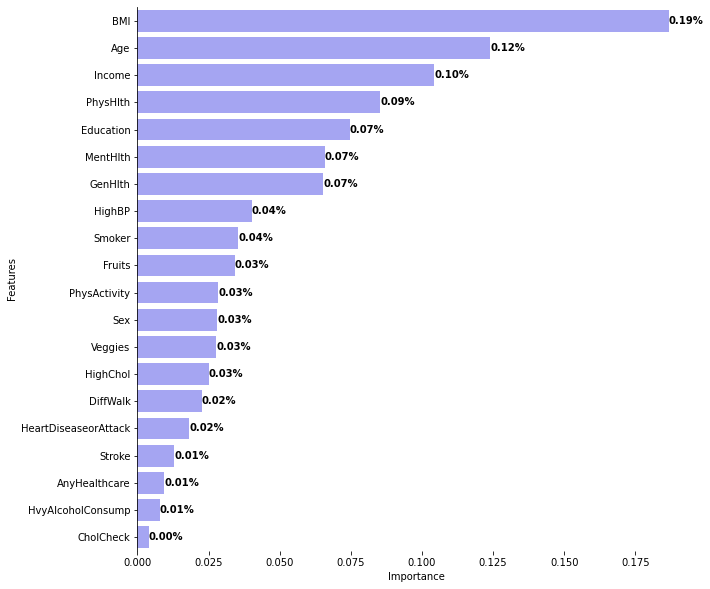

In [68]:
model.feature_importances_

feature_importances = pd.DataFrame({"Features":DM_df.columns[1:],"Importance":model.feature_importances_})

feature_importances = feature_importances.sort_values(by = 'Importance',ascending = False)

plt.figure(figsize=(10,10))
ax = sns.barplot(x='Importance',y='Features',data = feature_importances, color = 'b',alpha = 0.4)
sns.despine(top=True, right=True, left=False, bottom=True)

for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.2f%%"% rect.get_width(), weight='bold',ha = 'left', va = 'center')


plt.show()

The features with least importance are CholCheck>HvyAlcoholConsump>AnyHealthcare>Stroke

#### (C2)Random Forest with Tuning

In [69]:
#predicting using the RandomForest_Classifier after oversampling
from sklearn.ensemble import RandomForestClassifier

model= RandomForestClassifier(random_state=10,criterion="entropy",min_samples_leaf=200,
                                    min_samples_split=500,bootstrap=True,max_depth=5)

#fit the model on the data and predict the values
model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report
print('\033[1m' + "Tuned Random Forest"+ '\033[0m' "\n")
print(f"The training accuracy of the model is {model.score(X_train,Y_train)}. \n")

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

Tuned Random Forest

The training accuracy of the model is 0.8276603837112875. 

[[56825     0    72]
 [ 1404     0     4]
 [10264     0   166]]
Classification report: 
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     56897
           1       0.00      0.00      0.00      1408
           2       0.69      0.02      0.03     10430

    accuracy                           0.83     68735
   macro avg       0.51      0.34      0.31     68735
weighted avg       0.79      0.83      0.75     68735

Accuracy of the model:  0.8291409034698479


Accuracy has slightly increased but not performing well on minority class

In [71]:
# print(list(zip(DM_df.columns[1:],
#               model.feature_importances_)))

#### (C3)Random Forest with SMOTE

In [72]:
from sklearn.ensemble import RandomForestClassifier

model= RandomForestClassifier()

#fit the model on the data and predict the values
model.fit(X_trainS,Y_trainS)

Y_pred = model.predict(X_testS)

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report
print('\033[1m' + 'Random Forest with SMOTE' + '\033[0m' "\n")
print(f"The training accuracy of the model is {model.score(X_trainS,Y_trainS)}. \n")

cfm=confusion_matrix(Y_testS,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_testS,Y_pred))

acc=accuracy_score(Y_testS, Y_pred)
print("Accuracy of the model: ",acc)

Random Forest with SMOTE

The training accuracy of the model is 0.997546104818535. 

[[51744   184  5115]
 [ 1017 55220   691]
 [ 5613  1469 49406]]
Classification report: 
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     57043
           1       0.97      0.97      0.97     56928
           2       0.89      0.87      0.88     56488

    accuracy                           0.92    170459
   macro avg       0.92      0.92      0.92    170459
weighted avg       0.92      0.92      0.92    170459

Accuracy of the model:  0.9173466933397474


#### (C4)Tuned Random Forest with SMOTE

In [74]:
from sklearn.ensemble import RandomForestClassifier

model= RandomForestClassifier(n_estimators=200,random_state=10,
                              bootstrap=True,max_depth=8)

#fit the model on the data and predict the values
model.fit(X_trainS,Y_trainS)

Y_pred = model.predict(X_testS)

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report
print('\033[1m' + 'Tuned Random Forest with SMOTE' + '\033[0m' "\n")
print(f"The training accuracy of the model is {model.score(X_trainS,Y_trainS)}. \n")

cfm=confusion_matrix(Y_testS,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_testS,Y_pred))

acc=accuracy_score(Y_testS, Y_pred)
print("Accuracy of the model: ",acc)

Tuned Random Forest with SMOTE

The training accuracy of the model is 0.6437301218147762. 

[[44042  1347 11654]
 [ 7246 30045 19637]
 [ 8661 12345 35482]]
Classification report: 
              precision    recall  f1-score   support

           0       0.73      0.77      0.75     57043
           1       0.69      0.53      0.60     56928
           2       0.53      0.63      0.58     56488

    accuracy                           0.64    170459
   macro avg       0.65      0.64      0.64    170459
weighted avg       0.65      0.64      0.64    170459

Accuracy of the model:  0.6427880018068861


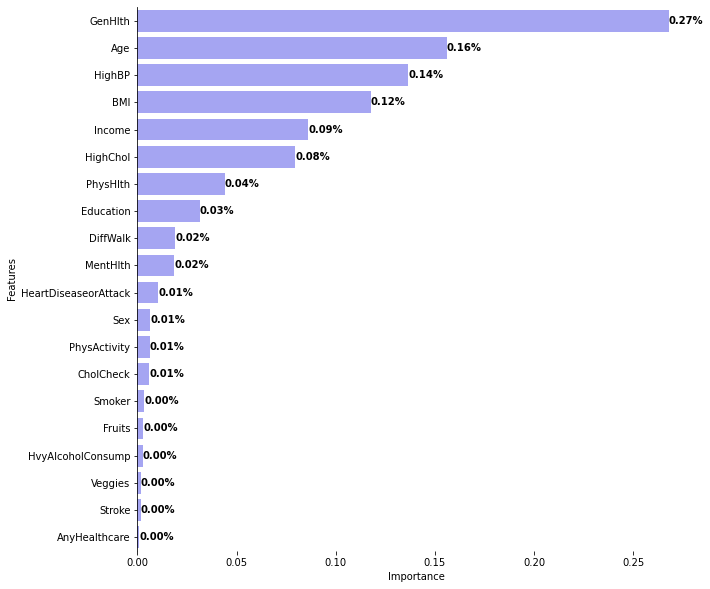

In [76]:
model.feature_importances_

feature_importances = pd.DataFrame({"Features":DM_df.columns[1:],"Importance":model.feature_importances_})

feature_importances = feature_importances.sort_values(by = 'Importance',ascending = False)

plt.figure(figsize=(10,10))
ax = sns.barplot(x='Importance',y='Features',data = feature_importances, color = 'b',alpha = 0.4)
sns.despine(top=True, right=True, left=False, bottom=True)

for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.2f%%"% rect.get_width(), weight='bold',ha = 'left', va = 'center')


plt.show()

### (D1)Gradient Boosting

In [77]:
#predicting using the AdaBoost_Classifier
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoost=GradientBoostingClassifier()

#fit the model on the data and predict the values
model_GradientBoost.fit(X_train ,Y_train)

GradientBoostingClassifier()

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

print('\033[1m' + 'Gradient Boosting Base Model' + '\033[0m' "\n")
print(f"The training accuracy of the model is {model_GradientBoost.score(X_train,Y_train)}. \n")

Y_pred = model_GradientBoost.predict(X_test)

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

Gradient Boosting Base Model

The training accuracy of the model is 0.8348245739832025. 

[[55421     1  1475]
 [ 1275     0   133]
 [ 8361     1  2068]]
Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.97      0.91     56897
           1       0.00      0.00      0.00      1408
           2       0.56      0.20      0.29     10430

    accuracy                           0.84     68735
   macro avg       0.47      0.39      0.40     68735
weighted avg       0.79      0.84      0.80     68735

Accuracy of the model:  0.8363861206081327


#### (D2)Gradient Boosting with Tuning

In [79]:
#predicting using the AdaBoost_Classifier
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoost=GradientBoostingClassifier(random_state=10, n_estimators=200,
    criterion='friedman_mse',
    min_samples_split=200,
    min_samples_leaf=100)

#fit the model on the data and predict the values
model_GradientBoost.fit(X_train ,Y_train)

GradientBoostingClassifier(min_samples_leaf=100, min_samples_split=200,
                           n_estimators=200, random_state=10)

In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

print('\033[1m' + 'Gradient Boosting Tuned Model' + '\033[0m' "\n")
print(f"The training accuracy of the model is {model_GradientBoost.score(X_train,Y_train)}. \n")

Y_pred = model_GradientBoost.predict(X_test)

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

Gradient Boosting Tuned Model

The training accuracy of the model is 0.8358034929324546. 

[[55392     0  1505]
 [ 1276     0   132]
 [ 8320     0  2110]]
Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.97      0.91     56897
           1       0.00      0.00      0.00      1408
           2       0.56      0.20      0.30     10430

    accuracy                           0.84     68735
   macro avg       0.47      0.39      0.40     68735
weighted avg       0.79      0.84      0.80     68735

Accuracy of the model:  0.8365752527824253


#### (D3)Gradient Boosting with SMOTE

In [81]:
#predicting using the AdaBoost_Classifier
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoost=GradientBoostingClassifier()

#fit the model on the data and predict the values
model_GradientBoost.fit(X_trainS ,Y_trainS)

GradientBoostingClassifier()

In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

print('\033[1m' + 'Gradient Boosting with SMOTE' + '\033[0m' "\n")
print(f"The training accuracy of the model is {model_GradientBoost.score(X_trainS,Y_trainS)}. \n")

Y_pred = model_GradientBoost.predict(X_testS)

cfm=confusion_matrix(Y_testS,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_testS,Y_pred))

acc=accuracy_score(Y_testS, Y_pred)
print("Accuracy of the model: ",acc)

Gradient Boosting with SMOTE

The training accuracy of the model is 0.7297497077199643. 

[[49610    22  7411]
 [ 3294 40585 13049]
 [ 7302 14742 34444]]
Classification report: 
              precision    recall  f1-score   support

           0       0.82      0.87      0.85     57043
           1       0.73      0.71      0.72     56928
           2       0.63      0.61      0.62     56488

    accuracy                           0.73    170459
   macro avg       0.73      0.73      0.73    170459
weighted avg       0.73      0.73      0.73    170459

Accuracy of the model:  0.7311963580685091


#### (D4)Tuned Gradient Boosting with SMOTE

In [83]:
#predicting using the AdaBoost_Classifier
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoost=GradientBoostingClassifier(random_state=10, n_estimators=200,
    criterion='friedman_mse',
    min_samples_split=200,
    min_samples_leaf=100)

#fit the model on the data and predict the values
model_GradientBoost.fit(X_trainS ,Y_trainS)

GradientBoostingClassifier(min_samples_leaf=100, min_samples_split=200,
                           n_estimators=200, random_state=10)

In [84]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

print('\033[1m' + 'Gradient Boosting Tuned with SMOTE' + '\033[0m' "\n")
print(f"The training accuracy of the model is {model_GradientBoost.score(X_trainS,Y_trainS)}. \n")

Y_pred = model_GradientBoost.predict(X_testS)

cfm=confusion_matrix(Y_testS,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_testS,Y_pred))

acc=accuracy_score(Y_testS, Y_pred)
print("Accuracy of the model: ",acc)

Gradient Boosting Tuned with SMOTE

The training accuracy of the model is 0.7625428991665305. 

[[53203     1  3839]
 [ 2482 42297 12149]
 [ 8213 13557 34718]]
Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.93      0.88     57043
           1       0.76      0.74      0.75     56928
           2       0.68      0.61      0.65     56488

    accuracy                           0.76    170459
   macro avg       0.76      0.76      0.76    170459
weighted avg       0.76      0.76      0.76    170459

Accuracy of the model:  0.7639256360767105


### (E1)AdaBoost 

In [85]:
#predicting using the AdaBoost_Classifier
from sklearn.ensemble import AdaBoostClassifier

model_AdaBoost=AdaBoostClassifier()
#fit the model on the data and predict the values
model_AdaBoost.fit(X_train,Y_train)
Y_pred=model_AdaBoost.predict(X_test)

In [86]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report
print('\033[1m' + 'BASE MODEL ADABOOST' + '\033[0m' "\n")
print(f"The training accuracy of the model is {model_AdaBoost.score(X_train,Y_train)}. \n")

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

BASE MODEL ADABOOST

The training accuracy of the model is 0.8330849664237036. 

[[55178     0  1719]
 [ 1268     0   140]
 [ 8275     0  2155]]
Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.97      0.91     56897
           1       0.00      0.00      0.00      1408
           2       0.54      0.21      0.30     10430

    accuracy                           0.83     68735
   macro avg       0.46      0.39      0.40     68735
weighted avg       0.79      0.83      0.80     68735

Accuracy of the model:  0.8341165345166218


#### (E2)AdaBoost with Tuning

In [87]:
#predicting using the AdaBoost_Classifier
from sklearn.ensemble import AdaBoostClassifier

model_AdaBoost=AdaBoostClassifier()
#fit the model on the data and predict the values
model_AdaBoost.fit(X_train,Y_train)
Y_pred=model_AdaBoost.predict(X_test)

In [88]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report
print('\033[1m' + 'Tuned ADABOOST' + '\033[0m' "\n")
print(f"The training accuracy of the model is {model_AdaBoost.score(X_train,Y_train)}. \n")

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

Tuned ADABOOST

The training accuracy of the model is 0.8330849664237036. 

[[55178     0  1719]
 [ 1268     0   140]
 [ 8275     0  2155]]
Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.97      0.91     56897
           1       0.00      0.00      0.00      1408
           2       0.54      0.21      0.30     10430

    accuracy                           0.83     68735
   macro avg       0.46      0.39      0.40     68735
weighted avg       0.79      0.83      0.80     68735

Accuracy of the model:  0.8341165345166218


#### (E3)AdaBoost with SMOTE

In [89]:
#predicting using the AdaBoost_Classifier
from sklearn.ensemble import AdaBoostClassifier

model_AdaBoost=AdaBoostClassifier()
#fit the model on the data and predict the values
model_AdaBoost.fit(X_trainS,Y_trainS)
Y_pred=model_AdaBoost.predict(X_testS)

In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report
print('\033[1m' + 'ADABOOST WITH SMOTE' + '\033[0m' "\n")
print(f"The training accuracy of the model is {model_AdaBoost.score(X_trainS,Y_trainS)}. \n")

cfm=confusion_matrix(Y_testS,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_testS,Y_pred))

acc=accuracy_score(Y_testS, Y_pred)
print("Accuracy of the model: ",acc)

ADABOOST WITH SMOTE

The training accuracy of the model is 0.6158673488629364. 

[[42304  2271 12468]
 [ 5169 25596 26163]
 [ 5912 13280 37296]]
Classification report: 
              precision    recall  f1-score   support

           0       0.79      0.74      0.77     57043
           1       0.62      0.45      0.52     56928
           2       0.49      0.66      0.56     56488

    accuracy                           0.62    170459
   macro avg       0.64      0.62      0.62    170459
weighted avg       0.64      0.62      0.62    170459

Accuracy of the model:  0.6171337389049566


#### (E4)Tuned AdaBoost with SMOTE 

In [91]:
#predicting using the AdaBoost_Classifier
from sklearn.ensemble import AdaBoostClassifier

model_AdaBoost=AdaBoostClassifier()
#fit the model on the data and predict the values
model_AdaBoost.fit(X_trainS,Y_trainS)
Y_pred=model_AdaBoost.predict(X_testS)

In [92]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report
print('\033[1m' + 'Tuned AdaBoost with SMOTE' + '\033[0m' "\n")
print(f"The training accuracy of the model is {model_AdaBoost.score(X_trainS,Y_trainS)}. \n")

cfm=confusion_matrix(Y_testS,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_testS,Y_pred))

acc=accuracy_score(Y_testS, Y_pred)
print("Accuracy of the model: ",acc)

Tuned AdaBoost with SMOTE

The training accuracy of the model is 0.6158673488629364. 

[[42304  2271 12468]
 [ 5169 25596 26163]
 [ 5912 13280 37296]]
Classification report: 
              precision    recall  f1-score   support

           0       0.79      0.74      0.77     57043
           1       0.62      0.45      0.52     56928
           2       0.49      0.66      0.56     56488

    accuracy                           0.62    170459
   macro avg       0.64      0.62      0.62    170459
weighted avg       0.64      0.62      0.62    170459

Accuracy of the model:  0.6171337389049566


### (F1)KNN

In [93]:
#predicting using the KNeighbors_classifier
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))))
#fit the model on the data and predict the values
print(f"K= {np.sqrt(len(X_train))}")

model_KNN.fit(X_train,Y_train)
Y_pred=model_KNN.predict(X_test)
print(list(zip(Y_test,Y_pred)))


K= 400.47596681948346
[(0, 0), (0, 0), (0, 0), (2, 0), (0, 0), (0, 0), (0, 0), (2, 2), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (2, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (2, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (2, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (2, 0), (0, 0), (2, 0), (0, 0), (2, 0), (0, 0), (2, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (2, 0), (2, 2), (0, 0), (0, 2), (0, 0), (0, 0), (0, 0), (2, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (2, 2), (0, 0), (0, 0), (0, 0), (0, 0), (2, 0), (0, 0), (0, 0), (0, 0), (2, 0), (0, 0), (2, 0), (2, 0), (2, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (2, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (2, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (

In [94]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report
from datetime import datetime

Start = datetime.now()
print('\033[1m' + 'KNN BASE MODEL' + '\033[0m' "\n")
print(f"The training accuracy of the model is {model_KNN.score(X_train,Y_train)}. \n")

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)
End = datetime.now()
print(f"The time taken to predict using KNN model is {End-Start}.")

KNN BASE MODEL

The training accuracy of the model is 0.8305784351014147. 

[[56532     0   365]
 [ 1384     0    24]
 [ 9792     0   638]]
Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.99      0.91     56897
           1       0.00      0.00      0.00      1408
           2       0.62      0.06      0.11     10430

    accuracy                           0.83     68735
   macro avg       0.49      0.35      0.34     68735
weighted avg       0.79      0.83      0.77     68735

Accuracy of the model:  0.8317451080235688
The time taken to predict using KNN model is 0:06:43.379128.


#### (F2)KNN with Tuning

In [95]:
# predicting using the KNeighbors_classifier

from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=4)
# fit the model on the data and predict the values

model_KNN.fit(X_train,Y_train)
Y_pred=model_KNN.predict(X_test)
print(list(zip(Y_test,Y_pred)))


[(0, 0), (0, 0), (0, 0), (2, 0), (0, 0), (0, 0), (0, 0), (2, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (2, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (2, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (2, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 2), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (2, 0), (0, 0), (2, 0), (0, 0), (2, 0), (0, 0), (2, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (2, 0), (2, 0), (0, 0), (0, 2), (0, 0), (0, 0), (0, 0), (2, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (2, 0), (0, 0), (0, 0), (0, 0), (0, 0), (2, 0), (0, 0), (0, 0), (0, 0), (2, 0), (0, 2), (2, 2), (2, 2), (2, 2), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (2, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (2, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (2, 0),

In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report
print('\033[1m' + 'KNN BASE MODEL' + '\033[0m' "\n")
print()
print(f"The training accuracy of the model is {model_KNN.score(X_train,Y_train)}. \n")

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

KNN BASE MODEL


The training accuracy of the model is 0.8583186287652528. 

[[54741    49  2107]
 [ 1285     4   119]
 [ 8812    37  1581]]
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.96      0.90     56897
           1       0.04      0.00      0.01      1408
           2       0.42      0.15      0.22     10430

    accuracy                           0.82     68735
   macro avg       0.43      0.37      0.38     68735
weighted avg       0.76      0.82      0.78     68735

Accuracy of the model:  0.8194660653233433


In [97]:
# from sklearn.metrics import accuracy_score
# my_dict={}
# for K in range(1,35):
#     model_KNN = KNeighborsClassifier(n_neighbors=K,metric="minkowski")
#     model_KNN.fit(X_train, Y_train) 
#     Y_pred = model_KNN.predict(X_test)
#     print ("Accuracy is ", accuracy_score(Y_test,Y_pred), "for K-Value:",K)
#     my_dict[K]=accuracy_score(Y_test,Y_pred)

In [98]:
# from sklearn.metrics import accuracy_score
# for K in range(1,6):
#     model_KNN = KNeighborsClassifier(n_neighbors=K,metric="minkowski")
#     model_KNN.fit(X_train, Y_train) 
#     Y_pred = model_KNN.predict(X_test)
#     print ("Accuracy is using minkowski ", accuracy_score(Y_test,Y_pred), "for K-Value:",K)
#     model_KNN = KNeighborsClassifier(n_neighbors=K,metric="euclidean")
#     model_KNN.fit(X_train, Y_train) 
#     Y_pred = model_KNN.predict(X_test)
#     print ("Accuracy is using euclidean ", accuracy_score(Y_test,Y_pred), "for K-Value:",K)
#     model_KNN = KNeighborsClassifier(n_neighbors=K,metric="manhattan")
#     model_KNN.fit(X_train, Y_train) 
#     Y_pred = model_KNN.predict(X_test)
#     print ("Accuracy is using manhatton", accuracy_score(Y_test,Y_pred), "for K-Value:",K)

#### (F3)KNN with SMOTE

In [99]:
# #predicting using the KNeighbors_classifier
# from sklearn.neighbors import KNeighborsClassifier
# model_KNN = KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),  metric= "manhattan")
# #fit the model on the data and predict the values

# model_KNN.fit(X_trainS,Y_trainS)
# Y_pred=model_KNN.predict(X_testS)
# print(list(zip(Y_testS,Y_pred)))


In [100]:
# from sklearn.metrics import confusion_matrix, accuracy_score, \
# classification_report
# print('\033[1m' + 'KNN with SMOTE' + '\033[0m' "\n")
# print(f"The training accuracy of the model is {model_KNN.score(X_trainS,Y_trainS)}. \n")

# cfm=confusion_matrix(Y_testS,Y_pred)
# print(cfm)

# print("Classification report: ")

# print(classification_report(Y_testS,Y_pred))

# acc=accuracy_score(Y_testS, Y_pred)
# print("Accuracy of the model: ",acc)

#### (F4)Tuned KNN with SMOTE

In [101]:
# #predicting using the KNeighbors_classifier
# from sklearn.neighbors import KNeighborsClassifier
# model_KNN = KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),  metric= "manhattan")
# #fit the model on the data and predict the values

# model_KNN.fit(X_trainS,Y_trainS)
# Y_pred=model_KNN.predict(X_testS)
# print(list(zip(Y_testS,Y_pred)))


In [102]:
# from sklearn.metrics import confusion_matrix, accuracy_score, \
# classification_report
# print('\033[1m' + 'KNN Tuned MODEL with SMOTE' + '\033[0m' "\n")
# print(f"The training accuracy of the model is {model_KNN.score(X_trainS,Y_trainS)}. \n")

# cfm=confusion_matrix(Y_testS,Y_pred)
# print(cfm)

# print("Classification report: ")

# print(classification_report(Y_testS,Y_pred))

# acc=accuracy_score(Y_testS, Y_pred)
# print("Accuracy of the model: ",acc)

### (G1)SVM

In [103]:
# from sklearn.svm import SVC
# svc_model= SVC()
# svc_model.fit(X_train,Y_train)
# Y_pred=svc_model.predict(X_test)
# # print(list(Y_pred))

In [104]:
# from sklearn.metrics import confusion_matrix, accuracy_score, \
# classification_report
# Start = datetime.now()

# print('\033[1m' + 'BASE MODEL SVM' + '\033[0m' "\n")
# print(f"The training accuracy of the model is {svc_model.score(X_train,Y_train)}. \n")

# cfm=confusion_matrix(Y_test,Y_pred)
# print(cfm)

# print("Classification report: ")

# print(classification_report(Y_test,Y_pred))

# acc=accuracy_score(Y_test, Y_pred)
# print("Accuracy of the model: ",acc)
# End = datetime.now()
# print(f"The time taken to predict using KNN model is {End-Start}.")

SVM & KNN are computaionally heavy

#Conculsion

Random Forest Classifier when used on SMOTE data is performing great on all the classes. Hence, it can be used to predict the Diabetes Status of individuals

# Deployment

In [29]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.8 MB 31.6 MB/s 
     |████████████████████████████████| 278 kB 58.3 MB/s 
     |████████████████████████████████| 55 kB 4.7 MB/s 
     |████████████████████████████████| 84 kB 3.3 MB/s 
     |████████████████████████████████| 84 kB 3.8 MB/s 
     |████████████████████████████████| 106 kB 69.7 MB/s 
     |████████████████████████████████| 2.3 MB 64.8 MB/s 
     |████████████████████████████████| 56 kB 5.9 MB/s 
     |████████████████████████████████| 64 kB 3.0 MB/s 
     |████████████████████████████████| 80 kB 10.8 MB/s 
     |████████████████████████████████| 68 kB 7.6 MB/s 
     |████████████████████████████████| 58 kB 4.0 MB/s 
     |████████████████████████████████| 50 kB 6.8 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4711 sha256=b4bd88169893b4ec419b8f92ccbb1bd92e1a76e6a46ded61423a4ab20d5f995a
  Stored in dire

In [30]:
import gradio as gr

In [31]:
import pickle

In [32]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(X_trainS,Y_trainS) 

# If you've fitted the model just type this to save it: Remember to change the file name
with open("model_DM.pkl", "wb") as f:
  pickle.dump(clf, f)  


In [33]:
def make_prediction(HighBP, HighChol, CholCheck, BMI, Smoker,
       Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies,
       HvyAlcoholConsump, AnyHealthcare, GenHlth, MentHlth, PhysHlth,
       DiffWalk, Sex, Age, Education, Income):
    with open("model_DM.pkl", "rb") as f:
        clf  = pickle.load(f)
        X_test = [[HighBP, HighChol, CholCheck, BMI, Smoker,
       Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies,
       HvyAlcoholConsump, AnyHealthcare, GenHlth, MentHlth, PhysHlth,
       DiffWalk, Sex, Age, Education, Income]]
        variables = scaler.transform(X_test)
        preds = clf.predict(variables)
    if preds == 1:
            return "You are Pre-Diabetic. Please concern your physician. \n Our healthcare service advices you to exercise regularly and eat healthy food. \n Prevention is better than Cure!!"
    elif preds == 0:
            return "You are non-diabetic. \n You are allowed to have a extra scoop of Ice-cream"
    elif preds == 2:
            return "You are Diabetic. Please concern your physician. \n Our healthcare service advices you to exercise regularly and eat healthy food with Medication. \n Please feel free to connect with our team."

#Create the input component for Gradio since we are expecting 4 inputs
HighBP_input = gr.Number(label = "Do you have HIGH BP?")
HighChol_input = gr.Number(label = "Do you have HIGH Cholesterol?")
CholCheck_input = gr.Number(label = "Have you checked you Cholesterol levels?")
BMI_input = gr.Number(label = "Please enter your BMI.")
Smoker_input = gr.Number(label = "Do you smoke cigarettes?")
Stroke_input = gr.Number(label = "Have you ever had stroke?")
HeartDiseaseorAttack_input = gr.Number(label = "Are you suffering from Heart Disease?")
PhysActivity_input = gr.Number(label = "Do you exercise daily?")
Fruits_input = gr.Number(label = "Do you eat Fruits daily?")
Veggies_input = gr.Number(label = "Do you eat Vegetables daily?")
HvyAlcoholConsump_input = gr.Number(label = "Do you consume Alcohol?")
AnyHealthcare_input = gr.Number(label = "Are you currently under medication?")
GenHlth_input = gr.Number(label = "Score your general health between 1-5 (5 meaning the fittest)?")
MentHlth_input = gr.Number(label = "Score your medical health between 1-5 (5 meaning the fittest)?")
PhysHlth_input = gr.Number(label = "Score your physical health between 1-5 (5 meaning the fittest)?")
DiffWalk_input = gr.Number(label = "Do you face difficulty in walking?")
Sex_input = gr.Number(label = "Which Gender do you belong to?")
Age_input = gr.Number(label = "Please enter your age.")
Education_input = gr.Number(label = "Please enter your level of education between 1-6. (6 meaning the highest degree")
Income_input = gr.Number(label = "Please enter the income category you belong to. \n {1] = 'Less Than $10,000' 2] = 'Less Than $10,000' 3] = 'Less Than $10,000' 4] = 'Less Than $10,000'  5] = 'Less Than $35,000' 6] = 'Less Than $35,000' 7] = 'Less Than $35,000' 8] = '$75,000 or More")

# We create the output
output = gr.Textbox()


app = gr.Interface(fn = make_prediction, inputs=[HighBP_input,HighChol_input,CholCheck_input,BMI_input,Smoker_input,Stroke_input,
                                                 HeartDiseaseorAttack_input,PhysActivity_input,Fruits_input,Veggies_input,
                                                 HvyAlcoholConsump_input,AnyHealthcare_input,GenHlth_input,MentHlth_input,
                                                 PhysHlth_input,DiffWalk_input,Sex_input,Age_input,Education_input,Income_input], outputs=output, capture_session=True, title="Do You Have Diabetes?")
app.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`

Setting up a public link... we have recently upgraded the way public links are generated. If you encounter any problems, please report the issue and downgrade to gradio version 3.13.0
.
Running on public URL: https://7a4bdfb4-9d73-45c9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
